# Objectives



1.   Building machine learning models to predict retail sales
based on historical transaction data, enabling the company to forecast future sales trends.
2.   Conduct comprehensive customer behaviour analysis to get
insights.



# Research Questions


1.   How does customer age and gender influence their purchasing behavior?
2.   Are there noticeable patterns in sales across different time periods?
3.   Which product categories hold the highest appeal among customers?
4.   What are the relationships between age, spending, and product preferences?
1.   What insights can be obtained from the distribution of product prices within each category?




# Data Understanding

This dataset contains synthetic data which  plays a pivotal role in unraveling the dynamics of retail operations and customer behavior.The dataset consists of the following columns:

1.   Transaction ID: A unique identifier for each transaction, allowing tracking and reference.
2.   Date: The date when the transaction occurred, providing insights into sales trends over time.
3.   Customer ID: A unique identifier for each customer, enabling
customer-centric analysis.
4.   Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.
5.   Age: The age of the customer, facilitating segmentation and exploration of age-related influences.
6.   Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.
7.   Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.
8.   Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.
9.   Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.









# Importing libraries

In [1]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fb70ec39bfe79d453eff37aee13d94b703dab5afcbf965f4f409d07066ccc6cf
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

import warnings

warnings.filterwarnings('ignore')

## Loading the dataset

In [30]:
sale_data = pd.read_csv("/content/retail_sales_dataset.csv")

In [5]:
sale_data.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
sale_data.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


# Data cleaning

In [7]:
sale_pr= ProfileReport(sale_data,title='Retail Sale Profile Report')
sale_pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Checking for missing values

In [8]:
missing_values_count = sale_data.isnull().sum()
missing_values_count

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


Converting date column to datetime format

In [31]:
sale_data['Date'] = pd.to_datetime(sale_data['Date'])

## Encoding categorical values

In [10]:
label_encoder = LabelEncoder()

sale_data['Gender'] = label_encoder.fit_transform(sale_data['Gender'])
sale_data['Product Category'] = label_encoder.fit_transform(sale_data['Product Category'])

sale_data1 = sale_data.copy()
sale_data1

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,1,34,0,3,50,150
1,2,2023-02-27,CUST002,0,26,1,2,500,1000
2,3,2023-01-13,CUST003,1,50,2,1,30,30
3,4,2023-05-21,CUST004,1,37,1,1,500,500
4,5,2023-05-06,CUST005,1,30,0,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,1,62,1,1,50,50
996,997,2023-11-17,CUST997,1,52,0,3,30,90
997,998,2023-10-29,CUST998,0,23,0,4,25,100
998,999,2023-12-05,CUST999,0,36,2,3,50,150


# Exploratory Data Analysis

In [11]:
sale_data1.describe()

,Transaction ID,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,0.49000,41.39200,1.035000,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,0.00000,18.00000,0.000000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,0.00000,29.00000,0.000000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,0.00000,42.00000,1.000000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,1.00000,53.00000,2.000000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,1.00000,64.00000,2.000000,4.000000,500.000000,2000.000000
std,288.819436,NaN,0.50015,13.68143,0.805247,1.132734,189.681356,559.997632


In [12]:
sale_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   int64         
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   int64         
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 70.4+ KB


In [13]:
sale_data1.shape

(1000, 9)

In [14]:
sale_data1.duplicated().sum()

0

In [15]:
sale_data1.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Getting all the unique values

In [16]:
dict = {}
for i in list(sale_data1.columns):
    dict[i] = sale_data1[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


## Checking for ouliers

In [17]:
def handle_outliers(sale_data, columns):
    for column in columns:
        if column in sale_data.columns:
            q1 = sale_data[column].quantile(0.25)
            q3 = sale_data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (sale_data[column] < low_b) | (sale_data[column] > high_b)

            if outliers.any():
                print(f"{column}: has outliers")
                sale_data[column] = np.where(sale_data[column] < low_b, low_b,
                                    np.where(sale_data[column] > high_b, high_b, sale_data[column]))
            else:
                print(f"{column}: no outliers")

    return sale_data

num_col = sale_data.select_dtypes(include='number').columns
df = handle_outliers(sale_data, num_col)

Transaction ID: no outliers
Gender: no outliers
Age: no outliers
Product Category: no outliers
Quantity: no outliers
Price per Unit: no outliers
Total Amount: no outliers


# Data Visualization

## Customer Age and Gender Influence on Purchasing Behavior

### Product Preferences by Age Group

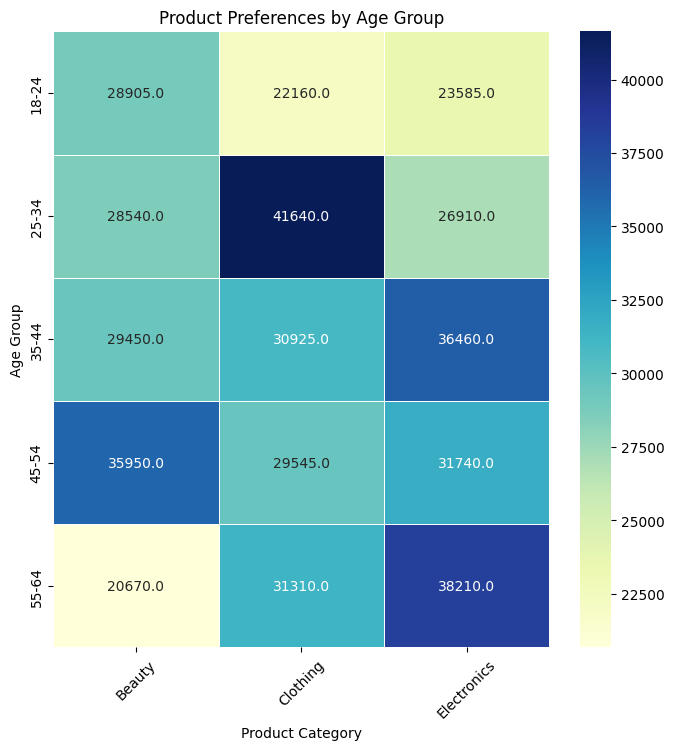

In [62]:


# Define age bins and corresponding labels for categorizing age ranges
age_bins = [18, 25, 35, 45, 55, 65]  # Age intervals to group data (18-24, 25-34, etc.)
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']  # Labels for each age group

# Use the pd.cut function to create a new column 'Age Group' by categorizing 'Age' based on the defined bins and labels
sale_data['Age Group'] = pd.cut(sale_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the sales data by 'Age Group' and 'Product Category', then calculate the total sales amount for each combination
age_group_product_sales = sale_data.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

# Plot the sales data in a heatmap to show the relationship between age groups and product categories
plt.figure(figsize=(8, 8))  # Set the size of the plot
sns.heatmap(age_group_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)  # Generate a heatmap
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

We can observe that people in the age group of 25-34 tend to buy a lot of products in the category of Clothing while people in the age group of 55-64 do not buy Beauty products as frequently.

### Customer Gender Analysis

Gender
Female    51.0
Male      49.0
Name: count, dtype: float64


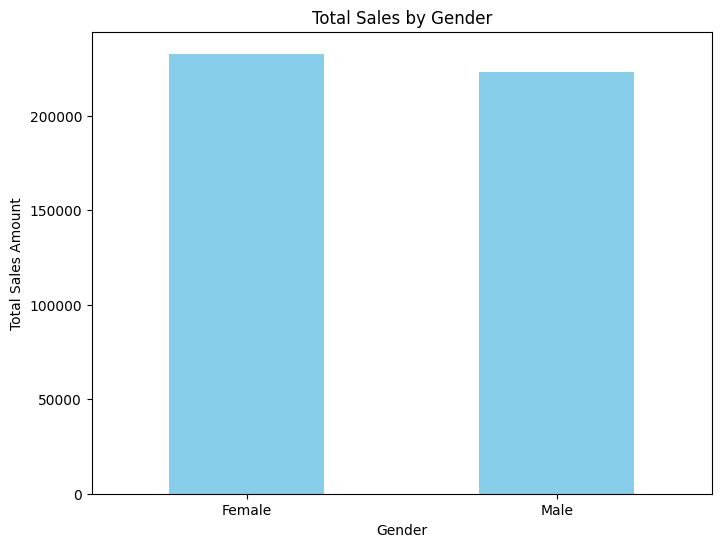

In [63]:
# Group the sales data by 'Gender' and calculate the total sales amount for each gender
gender_sales = sale_data.groupby('Gender')['Total Amount'].sum()

# Calculate the count of each gender in the dataset
gender_distribution = sale_data['Gender'].value_counts()

# Calculate the percentage distribution of each gender
gender_distribution_percentage = (gender_distribution / gender_distribution.sum()) * 100

# Print the percentage distribution of each gender
print(gender_distribution_percentage)

# Create a bar plot to visualize total sales by gender
plt.figure(figsize=(8, 6))  # Set the size of the plot
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)  # Set the x-axis labels to have no rotation
plt.show()

We can see that the count of male and female customers are almost the same, with the male edging the female 510 to 490.

### Product Preferences by Gender

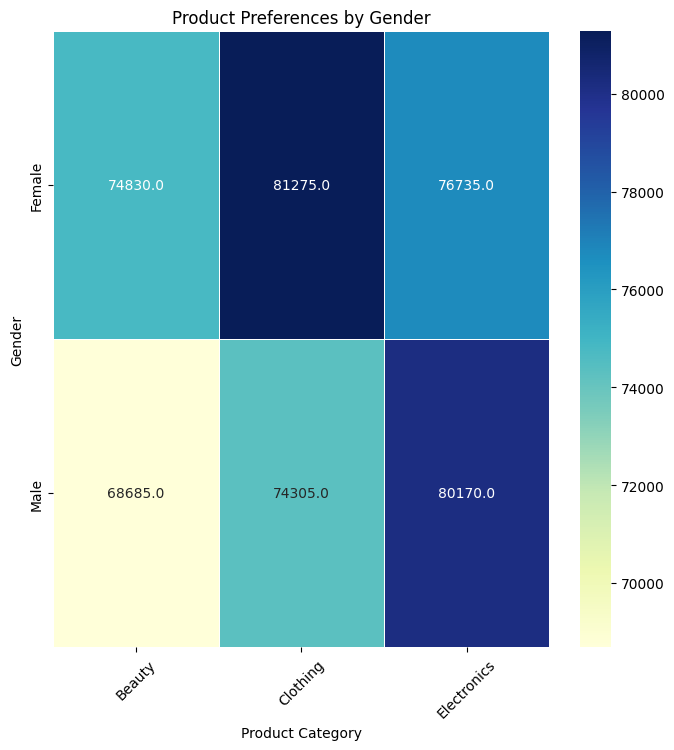

In [64]:
# Group the sales data by 'Gender' and 'Product Category',
# and sum the 'Total Amount' for each combination of gender and product category
gender_product_sales = sale_data.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# Set the size of the figure to be 8x8 inches
plt.figure(figsize=(8, 8))

# Create a heatmap to visualize the product sales preferences by gender
# 'gender_product_sales' is the data, 'annot=True' adds the data values to the heatmap,
# 'fmt=".1f"' formats the values to one decimal place, and 'cmap="YlGnBu"' sets the color scheme
sns.heatmap(gender_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)
plt.show()


Here, females spend the most on Clothing products and the least on Beauty while males spend most on Electronics and least on Beauty products.

## Sales patterns across different time periods

### Monthly sales trend

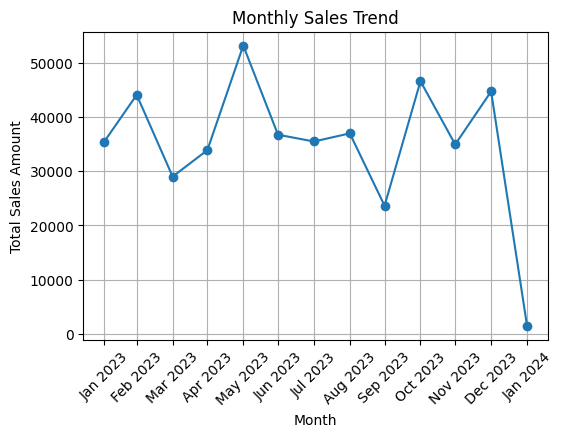

In [65]:
# Resample the sales data by month ('M'), summing the 'Total Amount' for each month
# The 'on' parameter specifies that the resampling should be based on the 'Date' column
monthly_sales = sale_data.resample('M', on='Date')['Total Amount'].sum()

# Set the figure size for the plot (6 inches wide and 4 inches tall)
plt.figure(figsize=(6, 4))

# Plot the monthly sales trend with markers at each data point
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

# Customize the x-ticks (month labels) with short month names and the year (e.g., Jan 2023)
# Rotate the labels 45 degrees for better readability
plt.xticks(ticks=monthly_sales.index,
           labels=[month.strftime('%b %Y') for month in monthly_sales.index],
           rotation=45)
# Add a grid to the plot
plt.grid(True)
plt.show()


There was a significant drop in total sales in the month of January of 2024, while there was a significant rise in sales in the month of May of 2023.

### Monthly Sales Trend by Product Category

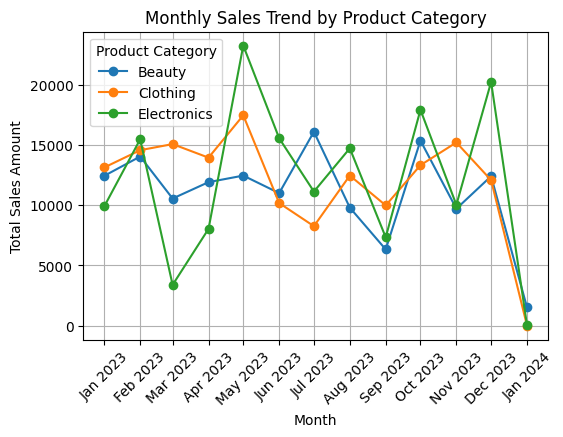

In [67]:
# Group the sales data by month (using 'Date' column) and 'Product Category',
# and sum the 'Total Amount' for each combination
monthly_category_sales = sale_data.groupby([sale_data['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

# Create a pivot table with 'Date' as the index, 'Product Category' as columns,
# and 'Total Amount' as the values. Fill any missing values with 0.
pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Loop through each product category in the pivot table and plot its monthly sales trend
for category in pivot_table.columns:
    # Plot the sales trend for the current category, converting the Date index to a timestamp for better plotting
   plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)
plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

# Add a legend to the plot, with 'Product Category' as the legend title
plt.legend(title='Product Category')

# Enable gridlines for better readability
plt.grid(True)

# Customize the x-axis ticks by converting the Date index to timestamps
# and formatting them as 'Month Year' (e.g., 'Jan 2024'). Rotate the labels for clarity.
plt.xticks(ticks=pivot_table.index.to_timestamp(),
           labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()],
           rotation=45)
plt.show()


Here, we can see the total sales amount generated per month by the product categories. We see that in the month of March of 2023, there was a dip in sales in Electronics, which boomed in the month of May 2023, which was that year's highest sale for Electronics. Likewise, for Clothing, it reached its peak in the month of May 2023 but then dipped in the month of July 2023 and so on.
In May, Electronics sales and Clothing peaked and Beauty sales remained moderate.
We can make one observation, that is in the month of May 2023, two of three product categories fared well and generated a high sales amount, while in the month of September 2023, all the three categories did not generate high sales amount with Beauty reaching its all-time low, which suggests that something might have occurred in that particular month owing to low product sales

## Product Categories Popularity.

### Product category distribution

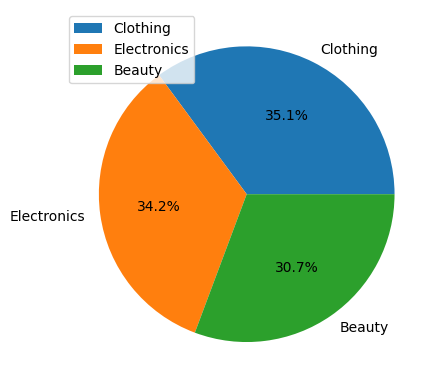

In [68]:
# Count the number of occurrences for each product category in the 'Product Category' column
pro_data = sale_data['Product Category'].value_counts()

# Create a pie chart with the counts of each product category
# pro_data.values provides the values (counts) and pro_data.index provides the labels (categories)
plt.pie(pro_data.values, labels=pro_data.index, autopct="%1.1f%%")  # autopct displays the percentage on the chart

# Add a legend to the pie chart and place it in the upper left corner
plt.legend(loc="upper left")
plt.show()


Here we can see that clothing products are sold more in terms of transactions and beauty products are transacted less, although there is no big difference between clothing and electronics both being transacted very high.

### Quantity by Product Category

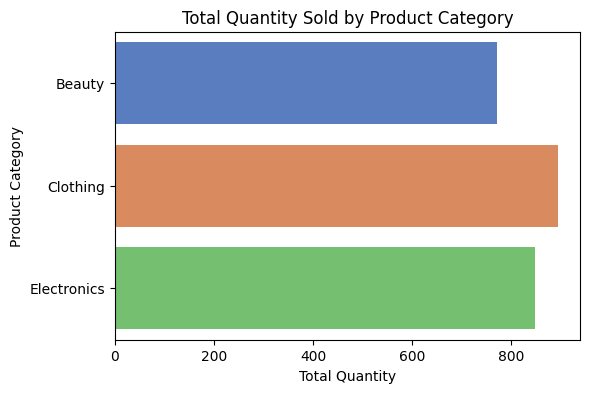

In [69]:
# Group the sales data by 'Product Category' and sum the 'Quantity' for each category.
# Reset the index to convert the result into a proper dataframe.
category_quantity = sale_data.groupby('Product Category')['Quantity'].sum().reset_index()

# Set the figure size for the plot.
plt.figure(figsize=(6, 4))

# Create a bar plot with 'Quantity' on the x-axis and 'Product Category' on the y-axis.
# Use the 'muted' color palette from seaborn for the bars.
sns.barplot(x='Quantity', y='Product Category', data=category_quantity, palette='muted')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Total Quantity')
plt.ylabel('Product Category')
plt.show()


## Age, Spending, and Product Preferences

### Age group distribution

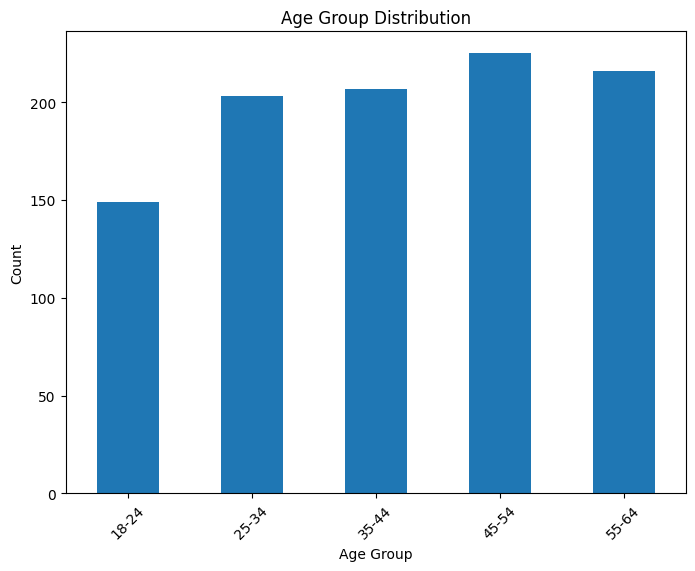

In [71]:
# Define the age ranges for binning
age_bins = [18, 25, 35, 45, 55, 65]

# Define labels that correspond to the bins (for clarity in the final output)
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Create a new column 'Age Group' in the sale_data DataFrame by cutting the 'Age' column into specified bins
# 'right=False' means that the right edge of the bin is not included
sale_data['Age Group'] = pd.cut(sale_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the distribution of data across the 'Age Group' categories and sort them by index (age group order)
age_distribution = sale_data['Age Group'].value_counts().sort_index()

# Plot the age distribution as a bar chart
age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)
plt.show()


we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds.

### Quantity purchased by Age group

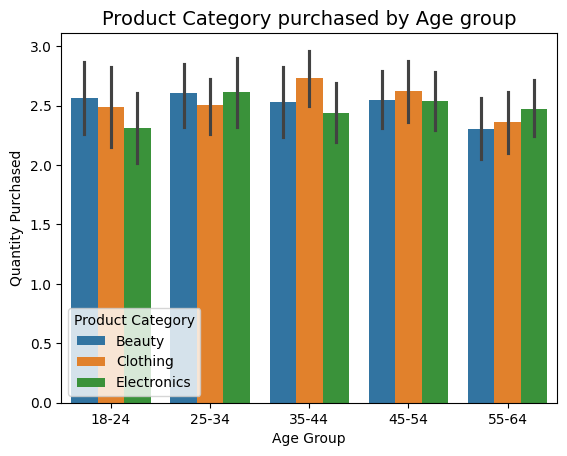

In [72]:
# Create a bar plot using seaborn
# x-axis: 'Age Group' (categories of age groups)
# y-axis: 'Quantity' (amount of products purchased)
# hue: 'Product Category' (different colors for different product categories)
# data: sale_data (the DataFrame containing the data)
sns.barplot(x='Age Group', y='Quantity', hue='Product Category', data=sale_data)

# Set the title of the plot with a font size of 14
plt.title('Product Category purchased by Age group', fontsize=14)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Quantity Purchased', fontsize=10)
plt.show()


For age group 18-24, Beauty products are more dominant as compared to Clothing and Electronics. Similarly, for age group 25-34, Beauty and Electronics are both equally bought and more than Clothing.

Spending

In [41]:
# Define the bin edges for age groups
age_bins = [18, 25, 35, 45, 55, 65]

# Define the labels corresponding to the age bins
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Create a new column 'Age Group' in the DataFrame `sale_data`
# Categorize the 'Age' column into the defined age bins with corresponding labels
# The `right=False` parameter means that the intervals are left-inclusive and right-exclusive
sale_data['Age Group'] = pd.cut(sale_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by the 'Age Group' column and calculate the sum of 'Total Amount' for each group
# Convert the result to a DataFrame and reset the index for better readability
overall_spending_agegroup = pd.DataFrame(sale_data.groupby('Age Group')['Total Amount'].agg('sum')).reset_index()

# Display the DataFrame containing total spending per age group
overall_spending_agegroup


,Age Group,Total Amount
0,18-24,74650
1,25-34,97090
2,35-44,96835
3,45-54,97235
4,55-64,90190


## Product Price Distribution

   Product Category  Price per Unit  Quantity  total_sales
0            Beauty              25       157         3925
5          Clothing              25       184         4600
10      Electronics              25       181         4525
1            Beauty              30       133         3990
6          Clothing              30       171         5130
11      Electronics              30       141         4230
2            Beauty              50       170         8500
7          Clothing              50       189         9450
12      Electronics              50       175         8750
3            Beauty             300       142        42600
8          Clothing             300       193        57900
13      Electronics             300       183        54900
4            Beauty             500       169        84500
9          Clothing             500       157        78500
14      Electronics             500       169        84500


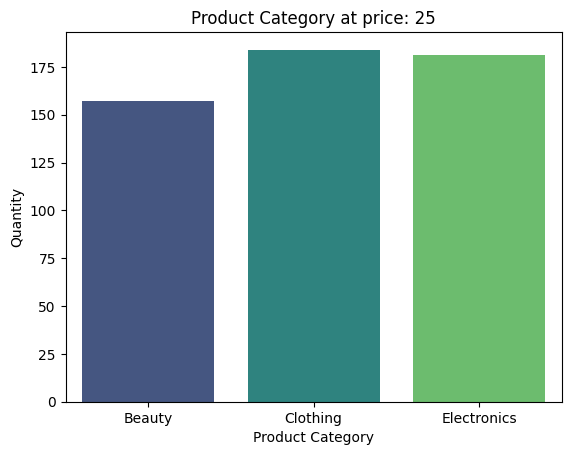

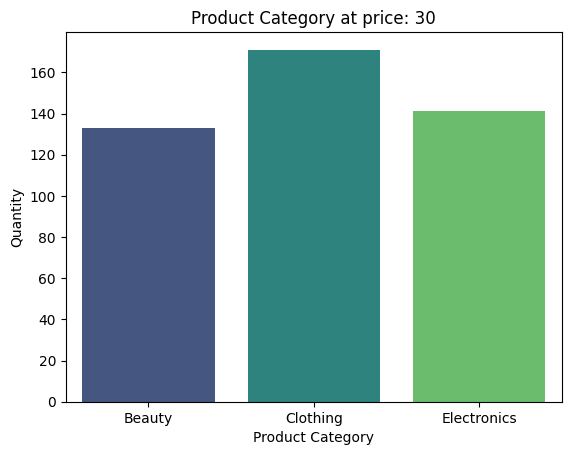

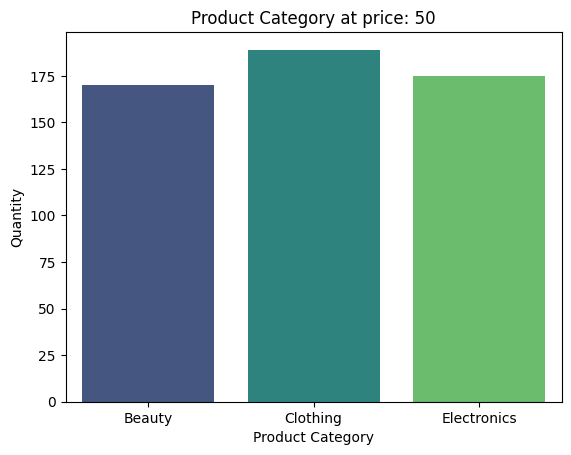

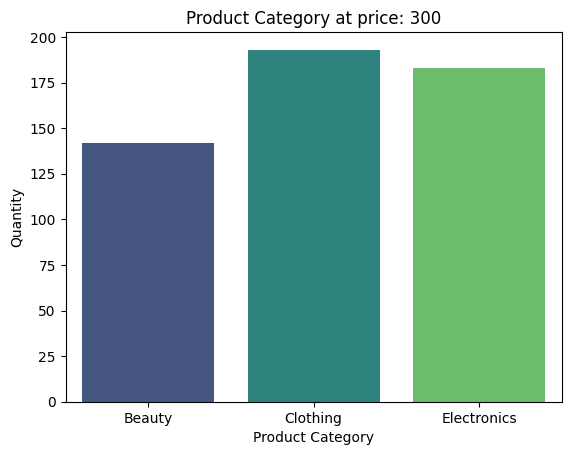

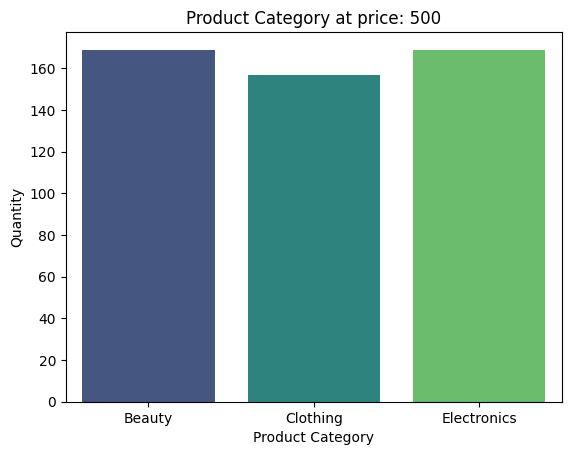

In [73]:
# Create a DataFrame from the sale_data by grouping it based on 'Product Category' and 'Price per Unit'.
# Calculate the total quantity for each combination of 'Product Category' and 'Price per Unit'.
data2 = pd.DataFrame(
  sale_data.groupby(['Product Category', 'Price per Unit'])['Quantity'].sum()).reset_index() .sort_values('Price per Unit')  # Sort the DataFrame based on 'Price per Unit' in ascending order

# Add a new column 'total_sales' to the DataFrame that is calculated as the product of 'Price per Unit' and 'Quantity'
data2['total_sales'] = data2['Price per Unit'] * data2['Quantity']
print(data2)

# Define a list of specific prices to visualize
prices = [25, 30, 50, 300, 500]

# Iterate over each price in the 'prices' list
for price in prices:
    # Create a bar plot for the quantity of products in each 'Product Category' where the 'Price per Unit' matches the current price
    sns.barplot(x='Product Category', y='Quantity', data=data2[data2['Price per Unit'] == price], palette='viridis')
    plt.title(f"Product Category at price: {price}")
    plt.show()


### Total Amount vs Unit Price

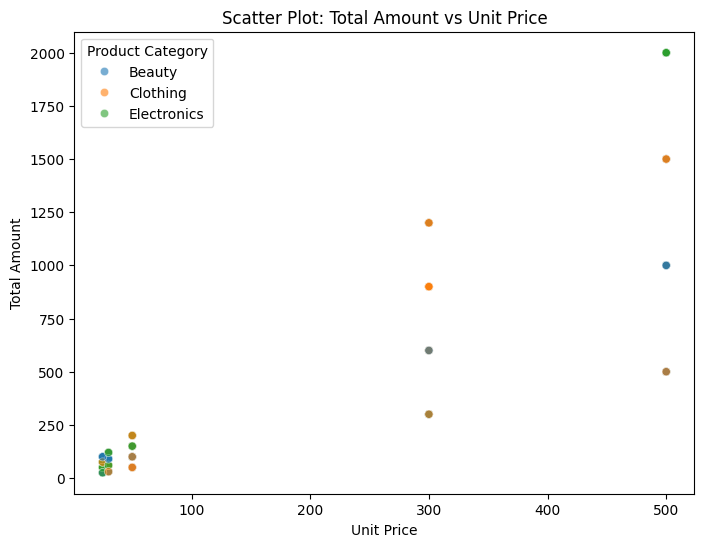

In [74]:

# Scatter Plot: Total Amount vs Unit Price

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a scatter plot with 'Price per Unit' on the x-axis and 'Total Amount' on the y-axis
# Points are colored by 'Product Category', with some transparency
sns.scatterplot(data=sale_data, x='Price per Unit', y='Total Amount', hue='Product Category', alpha=0.6)
plt.title('Scatter Plot: Total Amount vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Amount')

# Add a legend to the plot with a title and place it in the upper left corner
plt.legend(title='Product Category', loc='upper left')
plt.show()



We can see that products which are priced in the range of 0-100, they are bought in more quantity although they generate less revenue individually

# Correlation Analysis

In [44]:
#setting the transaction ID and Customer ID as index
sale_data1.set_index(['Transaction ID','Customer ID'],inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

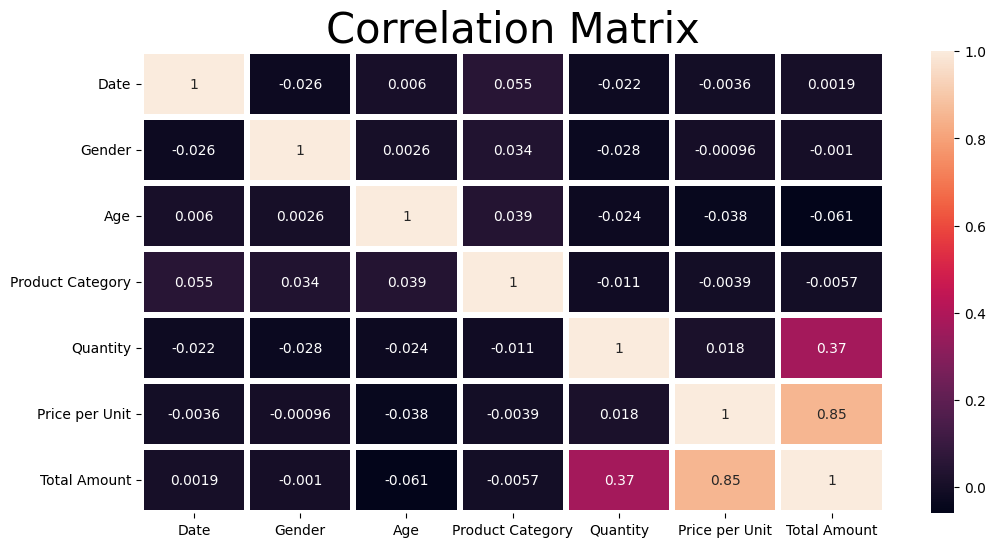

In [75]:
# Generate a heatmap to visualize the correlation matrix
# `annot=True` displays the correlation coefficients on the heatmap
# `fmt='.2g'` formats the correlation coefficients with up to two significant digits
# `linewidths=4` sets the width of the lines that will divide each cell in the heatmap
corr_matrix=sale_data1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',linewidths=4)
plt.title('Correlation Matrix',fontsize=30)

From this we can see that the Price per Unit and the Total Amount have a good relationship with a correlation matrix of 0.85.

# Model Selection

Feature selection

In [46]:
X = sale_data1[[ 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit']]
y = sale_data1['Total Amount']


Scaling the data

In [47]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

Split the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the model

## Linear Regression model

In [49]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Making Predictions

In [50]:
y_pred_lr = lr_model.predict(X_test)

Model evaluation

In [51]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr= r2_score(y_test, y_pred_lr)

print('Linear Regression MAE:', mae_lr)
print('Linear Regression RMSE:', rmse_lr)
print('Linear Regression R2:',r2_lr)


Linear Regression MAE: 173.03112272794672
Linear Regression RMSE: 204.65470244887783
Linear Regression R2: 0.8569204950413811


## Gradient Boosting Model

In [52]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Prediction on the test data

In [53]:
y_pred = gbr.predict(X_test)

Model Evaluation

In [54]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting MAE: {mae}')
print(f'Gradient Boosting RMSE: {rmse}')
print(f'Gradient Boosting R2:{r2}')

Gradient Boosting MAE: 1.3011671912700955
Gradient Boosting RMSE: 2.2113154148341563
Gradient Boosting R2:0.9999832954277446


## Random Forest Model

In [55]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Making Predictions

In [56]:
y_pred_rf = rf_model.predict(X_test)

Model Evaluation

In [57]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf= r2_score(y_test, y_pred_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest R2:', r2_rf)

Random Forest MAE: 0.0
Random Forest RMSE: 0.0
Random Forest R2: 1.0


The results for the models used are as follows:
        
1.   Linear Regression Model

        *   Linear Regression MAE :  173.03112272794672
        *   Linear Regression RMSE :  204.65470244887783
        *   Linear Regression R2 :  0.8569204950413811

2.   Gradient Boosting Model

        *   Gradient Boosting MAE :  1.3011671912700955
        *   Gradient Boosting RMSE :  2.2113154148341563
        *   Gradient Boosting R2 :  0.9999832954277446

3.   Random Forest Model

        *   Random Forest MAE :  0.0
        *   Random Forest RMSE :  0.0
        *   Random Forest R2 :  1.0

 The Random Forest model is the best model compared to the other models since it has a low MAE and MSE and a high R² therefore a better model for prediction.